Importieren aller wichtigen Bibliotheken


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!pip install pandas

# Datenverständnis

Datenimport

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Laden des Datensatzes  

In [ ]:
mms = pd.read_csv('/content/drive/MyDrive/inf505/bank_marketing_adal_v1.0.csv',sep= ';')
print(mms.shape)
mms.head()

(20493, 10)


,Alter,Beruf,Familienstand,Ausbildung,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label
0,31,Freiberufler,verheiratet,Allgemeine Hochschulreife,0,162,1,1,0,1
1,28,Beamter,verheiratet,Allgemeine Hochschulreife,0,1595,0,0,1,0
2,39,Techniker,geschieden,Allgemeine Hochschulreife,0,17441,1,1,1,1
3,54,Arbeitslos,geschieden,Allgemeine Hochschulreife,0,925,0,0,2,0
4,24,Techniker,ledig,Allgemeine Hochschulreife,0,-156,1,0,4,0


Erkennen der Datentypen

In [ ]:
mms.dtypes

Alter             int64
Beruf            object
Familienstand    object
Ausbildung       object
Ausgefallen       int64
Kontostand        int64
Eigentum          int64
Darlehen          int64
Dauer             int64
Label             int64
dtype: object

Fehlende Daten überprüfen

In [ ]:
mms.isnull().sum()

Alter            0
Beruf            0
Familienstand    0
Ausbildung       0
Ausgefallen      0
Kontostand       0
Eigentum         0
Darlehen         0
Dauer            0
Label            0
dtype: int64

Überprüfen der eindeutigen Daten

In [ ]:
for col in mms:
    print(f'{col}: {mms[col].unique()}')

Alter: [31 28 39 54 24 27 40 30 23 35 44 22 21 45 34 41 36 58 38 56 25 33 49 43
 46 26 37 29 42 53 50 48 52 32 47 55 51 57 60 59 69 20 62 61 65 63 66 64
 19 67 68 18]
Beruf: ['Freiberufler' 'Beamter' 'Techniker' 'Arbeitslos' 'unbekannt'
 'Servicekraft' 'Student' 'Angestellter' 'Rentner' 'Selbständig'
 'Hausgehilfin']
Familienstand: ['verheiratet' 'geschieden' 'ledig']
Ausbildung: ['Allgemeine Hochschulreife' 'Hochschulabschluss' 'Mittlere Reife'
 'unbekannt']
Ausgefallen: [0 1]
Kontostand: [  162  1595 17441 ...  2965  6850  5603]
Eigentum: [1 0]
Darlehen: [1 0]
Dauer: [   0    1    2 ... 2420 2453 2456]
Label: [1 0]


In [ ]:
mms.nunique()

Alter              52
Beruf              11
Familienstand       3
Ausbildung          4
Ausgefallen         2
Kontostand       5124
Eigentum            2
Darlehen            2
Dauer            1460
Label               2
dtype: int64

Datenanalyse:
Verständnis, wie sich die angegebenen Attribute auch auf den Status 'Label' beziehen.

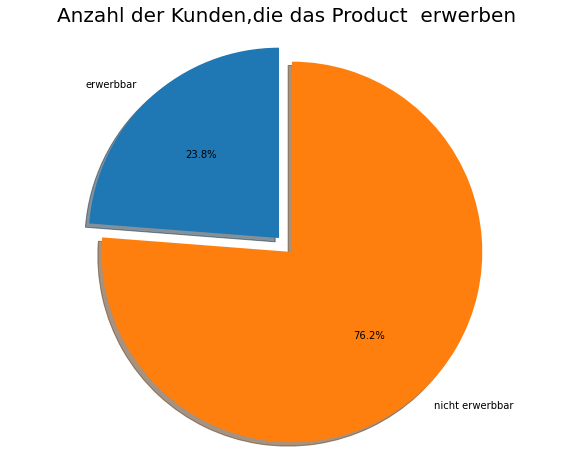

In [ ]:
labels = 'erwerbbar', 'nicht erwerbbar'
sizes = [mms.Label[mms['Label']==1].count(), mms.Label[mms['Label']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Anzahl der Kunden,die das Product  erwerben", size = 20)
plt.show()

Beziehungen basierend auf den fortlaufenden Datenattributen

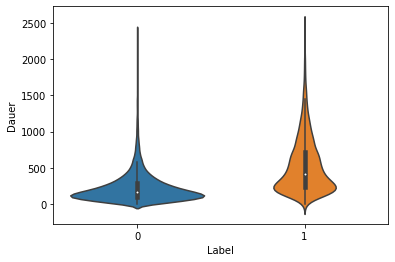

In [ ]:
ax= sns.violinplot(x='Label',y='Dauer',data=mms)

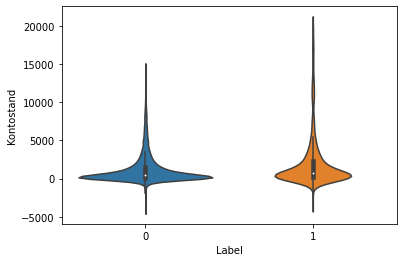

In [ ]:
ax= sns.violinplot(x='Label',y='Kontostand',data=mms)

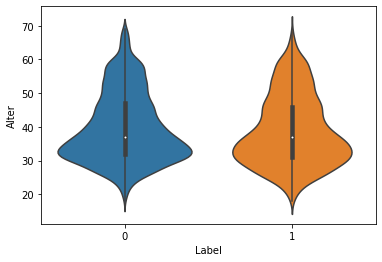

In [ ]:
ax= sns.violinplot(x='Label',y='Alter',data=mms)

In [ ]:
mms.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Alter,20493,NaN,NaN,NaN,39.4865,10.3343,18,32,37,47,69
Beruf,20493,11,unbekannt,4535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Familienstand,20493,3,verheiratet,11173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ausbildung,20493,4,Allgemeine Hochschulreife,10522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ausgefallen,20493,NaN,NaN,NaN,0.0114673,0.106472,0,0,0,0,1
Kontostand,20493,NaN,NaN,NaN,1428.93,2378.8,-4057,141,561,1640,19985
Eigentum,20493,NaN,NaN,NaN,0.567852,0.495387,0,0,1,1,1
Darlehen,20493,NaN,NaN,NaN,0.132338,0.338866,0,0,0,0,1
Dauer,20493,NaN,NaN,NaN,298.072,291.22,0,113,204,372,2456
Label,20493,NaN,NaN,NaN,0.237789,0.425739,0,0,0,0,1


Index(['Beruf', 'Familienstand', 'Ausbildung'], dtype='object')


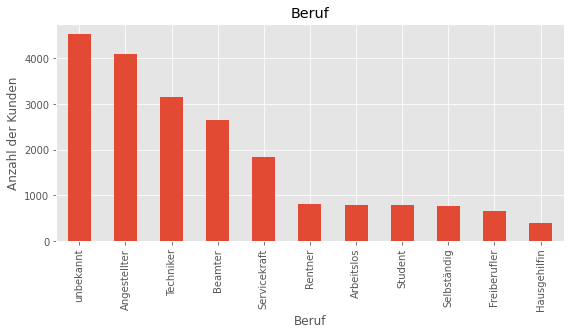

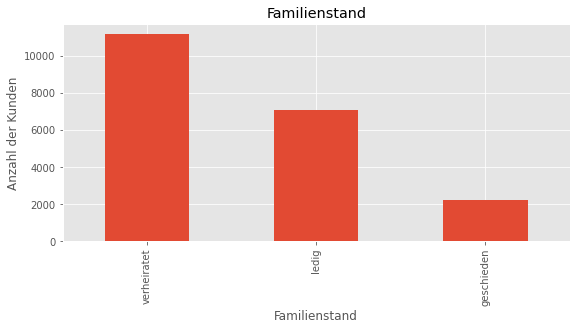

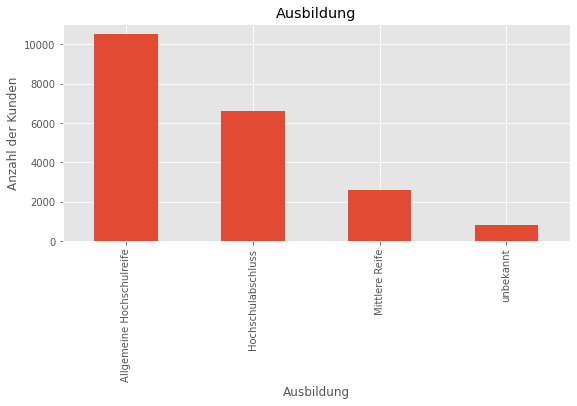

In [ ]:
# Identifizierung der kategorialen Variablen
badi= mms.select_dtypes(include= ["object"]).columns
print(badi)

# Zeichnen eines Balkendiagramms für jede kategoriale Variable
plt.style.use("ggplot")

for column in badi:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    mms[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("Anzahl der Kunden")
    plt.title(column)

# Datenvorverarbeitung

Normalisierung der Daten, dh alle Einkommensvorteile liegen im Bereich [0,1].
Algorithmen für maschinelles Lernen können normalerweise nur numerische Werte als unabhängige Variablen haben. Daher ist die Etikettencodierung von entscheidender Bedeutung, da sie kategoriale Etiketten mit geeigneten numerischen Werten codiert.

In [ ]:
#kategoriale Konvertierung von Werten in Binärwerte
df_dummy = pd.get_dummies(mms[['Familienstand', 'Beruf', 'Ausbildung']])
df_dummy.head(15)


,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
cols_to_scale = ['Alter','Kontostand','Dauer']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mms[cols_to_scale] = scaler.fit_transform(mms[cols_to_scale])

In [ ]:
df_dummy.shape

(20493, 18)

In [ ]:
daf = pd.concat([df_dummy, mms['Ausgefallen'], mms['Darlehen'], mms['Eigentum'], mms['Label'], mms['Kontostand'], mms['Dauer'], mms['Alter']], axis=1)
daf.info()
daf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20493 entries, 0 to 20492
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Familienstand_geschieden              20493 non-null  uint8  
 1   Familienstand_ledig                   20493 non-null  uint8  
 2   Familienstand_verheiratet             20493 non-null  uint8  
 3   Beruf_Angestellter                    20493 non-null  uint8  
 4   Beruf_Arbeitslos                      20493 non-null  uint8  
 5   Beruf_Beamter                         20493 non-null  uint8  
 6   Beruf_Freiberufler                    20493 non-null  uint8  
 7   Beruf_Hausgehilfin                    20493 non-null  uint8  
 8   Beruf_Rentner                         20493 non-null  uint8  
 9   Beruf_Selbständig                     20493 non-null  uint8  
 10  Beruf_Servicekraft                    20493 non-null  uint8  
 11  Beruf_Student  

,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Ausgefallen,Darlehen,Eigentum,Label,Kontostand,Dauer,Alter
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0.175485,0.000000,0.254902
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.235089,0.000407,0.196078
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0.894185,0.000407,0.411765
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.207221,0.000814,0.705882
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0.162258,0.001629,0.117647


In [ ]:
daf.shape

(20493, 25)

In [ ]:
for col in daf:
    print(f'{col}: {daf[col].unique()}')

Familienstand_geschieden: [0 1]
Familienstand_ledig: [0 1]
Familienstand_verheiratet: [1 0]
Beruf_Angestellter: [0 1]
Beruf_Arbeitslos: [0 1]
Beruf_Beamter: [0 1]
Beruf_Freiberufler: [1 0]
Beruf_Hausgehilfin: [0 1]
Beruf_Rentner: [0 1]
Beruf_Selbständig: [0 1]
Beruf_Servicekraft: [0 1]
Beruf_Student: [0 1]
Beruf_Techniker: [0 1]
Beruf_unbekannt: [0 1]
Ausbildung_Allgemeine Hochschulreife: [1 0]
Ausbildung_Hochschulabschluss: [0 1]
Ausbildung_Mittlere Reife: [0 1]
Ausbildung_unbekannt: [0 1]
Ausgefallen: [0 1]
Darlehen: [1 0]
Eigentum: [1 0]
Label: [1 0]
Kontostand: [0.17548457 0.23508859 0.89418518 ... 0.29207221 0.45366442 0.40179686]
Dauer: [0.00000000e+00 4.07166124e-04 8.14332248e-04 ... 9.85342020e-01
 9.98778502e-01 1.00000000e+00]
Alter: [0.25490196 0.19607843 0.41176471 0.70588235 0.11764706 0.17647059
 0.43137255 0.23529412 0.09803922 0.33333333 0.50980392 0.07843137
 0.05882353 0.52941176 0.31372549 0.45098039 0.35294118 0.78431373
 0.39215686 0.74509804 0.1372549  0.29411765

* Aufteilen * des Datensatzes in Trainings- und Testdatensätze
In der Spalte "Etikett" haben wir das Ergebnis über den Kunden, ob er die Karte kauft oder nicht
Wir speichern es als Ausgabedaten in Y.
und wir speichern den Rest der Daten über den Kunden, die wir als Eingabedaten in X verwenden werden

In [ ]:
from sklearn.model_selection import train_test_split

predict = [x for x in daf.columns if x not in ['Label']]
#input 
X = daf[predict]
#output 
Y = daf.Label


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, stratify = Y, random_state = 4711)

In [ ]:
X_train.shape

(14345, 24)

In [ ]:
X_test.shape

(6148, 24)

In [ ]:
Y_train.shape

(14345,)

In [ ]:
Y_test.shape

(6148,)

In [ ]:
X_train[:9]


,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Ausgefallen,Darlehen,Eigentum,Kontostand,Dauer,Alter
5370,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0.139963,0.047638,0.254902
19817,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.192039,0.425081,0.274510
17140,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.209508,0.204805,0.176471
1521,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0.281424,0.019544,0.666667
19973,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.452874,0.460098,0.686275
14372,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.190750,0.132329,0.313725
15988,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.193204,0.166531,0.901961
20045,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.222361,0.478827,0.470588
9681,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0.161384,0.078583,0.333333


In [ ]:
len(X_train.columns)

24

# Datenmodellierung

## Tenserflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(24,),activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100)


Epoch 1/100
449/449 [==============================] - 2s 2ms/step - loss: 0.5603 - accuracy: 0.7347
Epoch 2/100
449/449 [==============================] - 1s 2ms/step - loss: 0.4132 - accuracy: 0.8114
Epoch 3/100
449/449 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8213
Epoch 4/100
449/449 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8193
Epoch 5/100
449/449 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8156
Epoch 6/100
449/449 [==============================] - 1s 2ms/step - loss: 0.3919 - accuracy: 0.8213
Epoch 7/100
449/449 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.8222
Epoch 8/100
449/449 [==============================] - 1s 2ms/step - loss: 0.3892 - accuracy: 0.8190
Epoch 9/100
449/449 [==============================] - 1s 2ms/step - loss: 0.3909 - accuracy: 0.8183
Epoch 10/100
449/449 [==============================] - 1s 1ms/step - loss: 0.3864 - accura

In [ ]:
model.evaluate(X_test, Y_test)

193/193 [==============================] - 0s 985us/step - loss: 0.3851 - accuracy: 0.8159


[0.3851113021373749, 0.8158750534057617]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[[0.300517  ]
 [0.65164137]
 [0.02900073]
 ...
 [0.0087412 ]
 [0.5933927 ]
 [0.5577681 ]]


In [ ]:
from sklearn.metrics import average_precision_score
average_precision_score(Y_test, y_pred)


0.6475572953396069

Text(0.5, 42.0, 'Prediction')

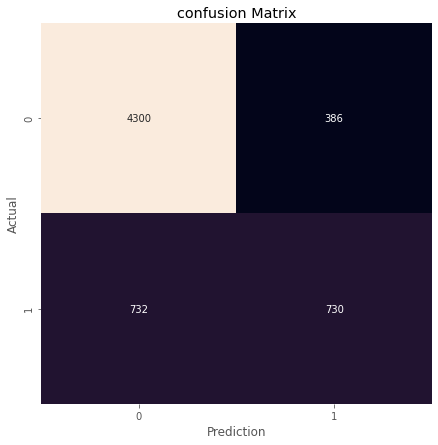

In [ ]:
import seaborn as sn
results= X_test.copy()
results['adj_prediction']= np.where(y_pred>=0.55,1,0)
cm=confusion_matrix(Y_test,results['adj_prediction'])
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt="d",cbar=False )
plt.title('confusion Matrix')
plt.ylabel("Actual")
plt.xlabel("Prediction")

In [ ]:
from sklearn.metrics import recall_score
recall= recall_score(Y_test,results['adj_prediction'])
print(recall)

0.4993160054719562


In [ ]:
accuracy= accuracy_score(Y_test,results['adj_prediction'])
print(accuracy)

0.8181522446324008


Text(0, 0.5, 'TPR')

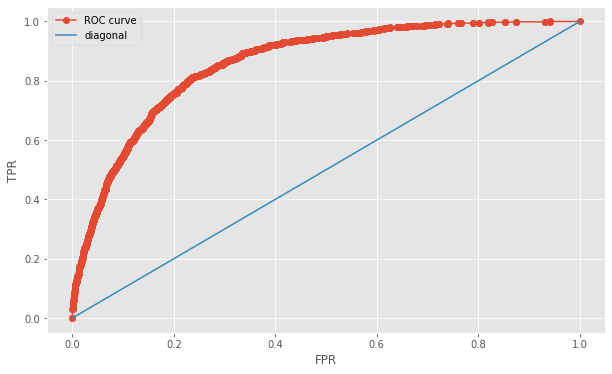

In [ ]:
import numpy as np 
from sklearn.metrics import roc_curve, auc
fpr, tpr, threholds = roc_curve(Y_test,y_pred)
plt.subplots(figsize=(10,6))
plt.plot(fpr,tpr,'o-',label="ROC curve")
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),label='diagonal')

plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [ ]:
tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC',
    summation_method='interpolation', name=None, dtype=None,
    thresholds=None, multi_label=False, label_weights=None
)

In [ ]:
Auc= roc_auc_score(Y_test,y_pred)
print(Auc)

0.8592422169713552


## Random Forest Classificer

In [ ]:
predict = [x for x in daf.columns if x not in ['Label']]
#input 
X2 = daf[predict]
#output 
Y2 = daf.Label


X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True, stratify = Y2, random_state = 4711)

In [ ]:
rf=RandomForestClassifier(bootstrap = True,max_depth= 81,min_samples_leaf= 1,min_samples_split= 10,n_estimators=800 )
rf.fit(X2_train,Y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=81, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print('\n Random Forest Training Score:',rf.score(X2_train,Y2_train))


 Random Forest Training Score: 0.9213663297316138


In [ ]:
predictions2 = rf.predict(X2_test)
predicted_probs2 = rf.predict_proba(X2_test)
print(predicted_probs2)


[[0.67806852 0.32193148]
 [0.25283653 0.74716347]
 [0.95749018 0.04250982]
 ...
 [0.94004974 0.05995026]
 [0.348429   0.651571  ]
 [0.77463953 0.22536047]]


In [ ]:
results2= X2_test.copy()
results2['Label'] = Y2_test
results2['prediction'] = predictions2
results2['probability'] =predicted_probs2[:,1]
results2.head()

,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Ausgefallen,Darlehen,Eigentum,Kontostand,Dauer,Alter,Label,prediction,probability
14343,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.195242,0.131922,0.196078,0,0,0.321931
18379,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.175235,0.267508,0.254902,1,1,0.747163
4131,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.168788,0.039902,0.607843,0,0,0.042510
19980,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.184427,0.461726,0.705882,1,1,0.758124
14251,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.181848,0.130700,0.431373,0,0,0.331023


In [ ]:
results2[(Y2_test==1)&(predictions2==0)]
results2.head()

,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Ausgefallen,Darlehen,Eigentum,Kontostand,Dauer,Alter,Label,prediction,probability
14343,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.195242,0.131922,0.196078,0,0,0.321931
18379,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.175235,0.267508,0.254902,1,1,0.747163
4131,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.168788,0.039902,0.607843,0,0,0.042510
19980,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.184427,0.461726,0.705882,1,1,0.758124
14251,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.181848,0.130700,0.431373,0,0,0.331023


Text(0.5, 42.0, 'Prediction')

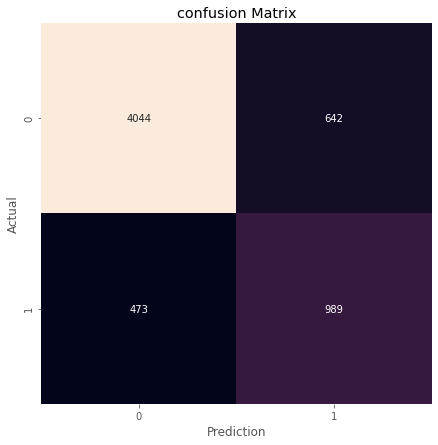

In [ ]:
results2['adj_prediction']= np.where(results2['probability']>=0.39,1,0)
cm2=confusion_matrix(Y2_test ,results2['adj_prediction'])
plt.figure(figsize=(7,7))
sns.heatmap(cm2,annot=True,fmt="d",cbar=False )
plt.title('confusion Matrix')
plt.ylabel("Actual")
plt.xlabel("Prediction")

In [ ]:
accuracy= accuracy_score(Y2_test,results2['adj_prediction'])
print(accuracy)

0.8186402081977879


In [ ]:
from sklearn.metrics import precision_score
precision= precision_score(Y2_test,results2['prediction'])
print(precision)

0.6715643906655142


In [ ]:
from sklearn.metrics import recall_score
recall= recall_score(Y2_test,results2['prediction'])
print(recall)

0.5314637482900136


In [ ]:
Auc= roc_auc_score(Y2_test,results2['probability'])
print(Auc)

0.8705041883352512


Text(0, 0.5, 'TPR')

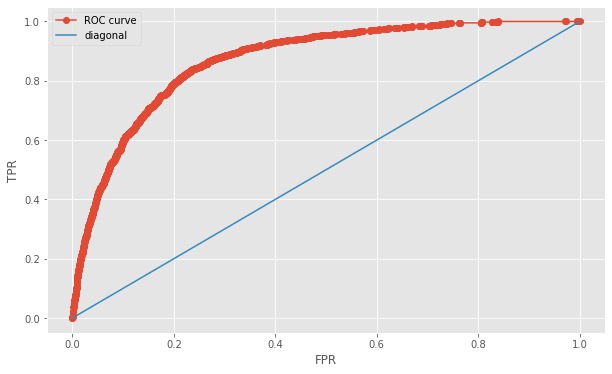

In [ ]:
import numpy as np 
from sklearn.metrics import roc_curve, auc
fpr, tpr, threholds = roc_curve(Y2_test,results2['probability'])
plt.subplots(figsize=(10,6))
plt.plot(fpr,tpr,'o-',label="ROC curve")
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),label='diagonal')

plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

## `Random Forest vs Tensorflow`

Text(0, 0.5, 'TPR')

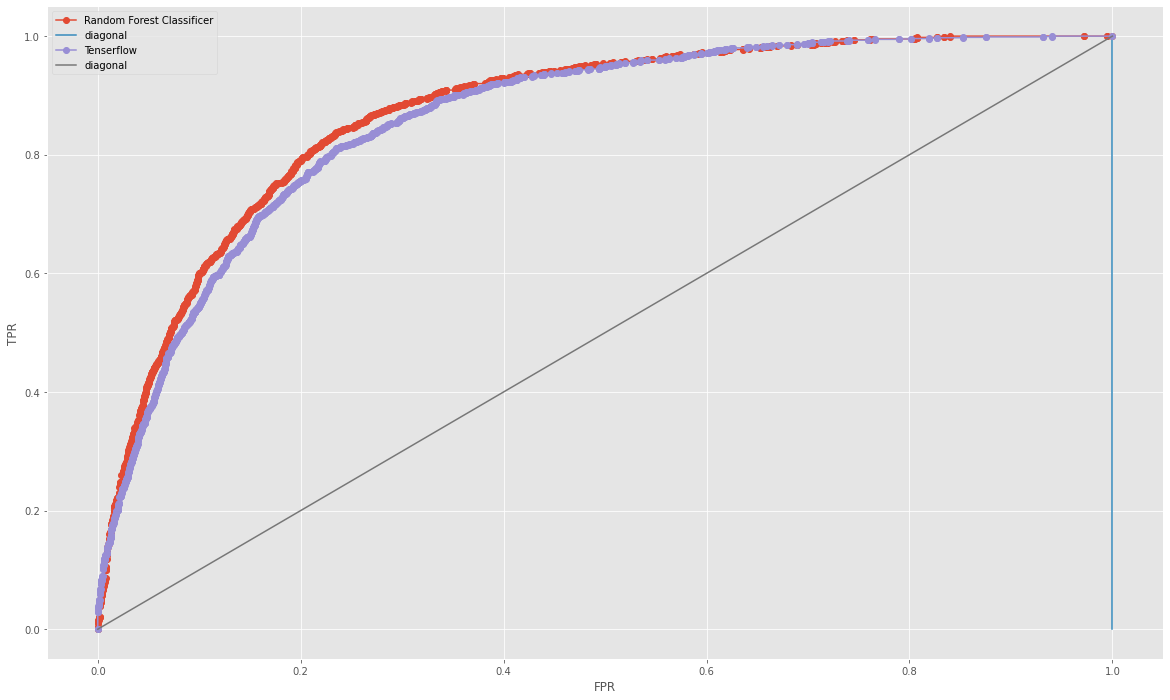

In [ ]:
fpr, tpr, threholds = roc_curve(Y2_test,results2['probability'])
plt.subplots(figsize=(20,12))
plt.plot(fpr,tpr,'o-',label="Random Forest Classificer")
plt.plot(np.linspace(1,1,10),np.linspace(0,1,10),label='diagonal')

plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

fpr, tpr, threholds = roc_curve(Y_test,y_pred)
plt.plot(fpr,tpr,'o-',label="Tenserflow ")
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),label='diagonal')

plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")



#  Evaluation

In [ ]:
rf=RandomForestClassifier(criterion="gini",random_state=4711,max_depth=6)
print('parameters currently in use:\n')
print(rf.get_params())

parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 4711, 'verbose': 0, 'warm_start': False}


In [ ]:
#Anzahl der Bäume im zufälligen Wald
n_estimators = [int(x) for x in np.linspace(start = 800,stop = 900,num= 10)]
# Maximale Anzahl von Ebenen im Baum
max_depth=[int(x)for x in np.linspace(80,85,num=10)]
max_depth.append(None)
# Mindestanzahl von Samples, die zum Teilen eines Knotens erforderlich sind
min_samples_split = [5,10]
# Mindestanzahl der an jedem Blattknoten erforderlichen Proben
min_samples_leaf = [1,4]
# Erstellen Sie das Zufallsraster
random_grid={'n_estimators':n_estimators,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [800, 800, 801, 801, 802, 802, 803, 803, 804, 805], 'max_depth': [80, 80, 81, 81, 82, 82, 83, 83, 84, 85, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [1, 4]}


In [ ]:
rf=RandomForestClassifier(n_estimators=10,criterion="gini",random_state=4711)

In [ ]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions = random_grid,n_iter =100, cv=3,random_state=4711,n_jobs=-1)

In [ ]:
rf_random.fit(X_train,Y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_


{'max_depth': 81,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 800}

In [ ]:
rf_random.best_score_

0.8241896648558894

In [ ]:
# Fit Random Forest classifier
rf=RandomForestClassifier(bootstrap = True,max_depth= 81,min_samples_leaf= 1,min_samples_split= 10,n_estimators=800 )
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=81, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = rf.predict(X_test)
predicted_probs = rf.predict_proba(X_test)
print(predicted_probs)

[[0.66744099 0.33255901]
 [0.24767825 0.75232175]
 [0.95402327 0.04597673]
 ...
 [0.93600373 0.06399627]
 [0.31319869 0.68680131]
 [0.77504158 0.22495842]]


In [ ]:
results= X_test.copy()
results['Label'] = Y_test
results['prediction'] = predictions
results['probability'] =predicted_probs[:,1]
results.head()

,Familienstand_geschieden,Familienstand_ledig,Familienstand_verheiratet,Beruf_Angestellter,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Ausbildung_Allgemeine Hochschulreife,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt,Ausgefallen,Darlehen,Eigentum,Kontostand,Dauer,Alter,Label,prediction,probability
14343,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.195242,0.131922,0.196078,0,0,0.332559
18379,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.175235,0.267508,0.254902,1,1,0.752322
4131,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.168788,0.039902,0.607843,0,0,0.045977
19980,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.184427,0.461726,0.705882,1,1,0.759447
14251,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.181848,0.130700,0.431373,0,0,0.333982


In [ ]:
accuracy=accuracy_score(Y_test,results['prediction'])
print(accuracy)

0.8259596616785947


In [ ]:
param_grid={
    'max_depth':[60,70,80,90],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[8,10,12],
    'n_estimators':[100,200,300,800]
}
rf= RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)


In [ ]:
grid_search.fit(X_train,Y_train)
grid_search.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 32.4min finished


{'max_depth': 60,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
rf=RandomForestClassifier(bootstrap=True,
                          max_depth=90,
                          min_samples_leaf=3,
                          min_samples_split=8,
                          n_estimators=300)
rf.fit(X_train, Y_train)
prediction=rf.predict(X_test)
results['prediction']=predictions

accuracy= accuracy_score(Y_test,results['prediction'])
print(accuracy)

0.8259596616785947


In [ ]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(Y_test,results['probability'])
print('AUC',auc)

AUC 0.8706338057362123


Text(0, 0.5, 'TPR')

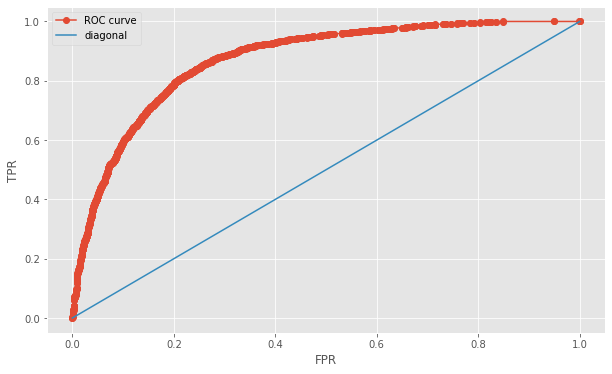

In [ ]:
import numpy as np 
from sklearn.metrics import roc_curve, auc
fpr, tpr, threholds = roc_curve(Y_test,results['probability'])
plt.subplots(figsize=(10,6))
plt.plot(fpr,tpr,'o-',label="ROC curve")
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),label='diagonal')

plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

### Vorhersage der Idealisten

Das Löschen von Daten ist nicht der richtige Weg, um die Genauigkeit zu erhöhen. In diesem Abschnitt wird nur gezeigt, was uns durch den Kopf gegangen ist.

Dauer                                   0.427468
Kontostand                              0.235777
Alter                                   0.162744
Eigentum                                0.036333
Beruf_Rentner                           0.015594
Darlehen                                0.011212
Familienstand_verheiratet               0.008781
Beruf_Techniker                         0.008613
Ausbildung_Hochschulabschluss           0.008294
Beruf_unbekannt                         0.008107
Beruf_Beamter                           0.008068
Familienstand_ledig                     0.007872
Beruf_Angestellter                      0.007408
Ausbildung_Allgemeine Hochschulreife    0.007222
Familienstand_geschieden                0.006398
Beruf_Servicekraft                      0.005890
Beruf_Arbeitslos                        0.005097
Ausbildung_Mittlere Reife               0.005086
Beruf_Selbständig                       0.004740
Beruf_Freiberufler                      0.004325
Beruf_Hausgehilfin  

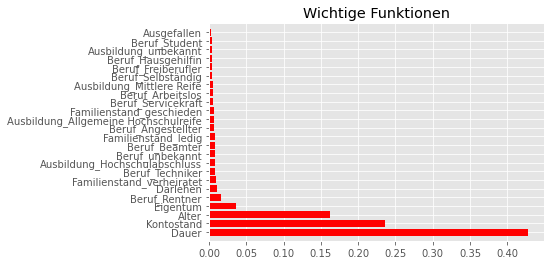

In [ ]:
Funktionsliste=list(X.columns)
modelo= RandomForestClassifier(n_estimators=800,random_state=4711)
modelo.fit(X_train, Y_train)
Wichtige_Funktionen= pd.Series(modelo.feature_importances_,index=Funktionsliste).sort_values(ascending=False)
print(Wichtige_Funktionen)
plt.figure()
plt.title("Wichtige Funktionen")
plt.barh(range(X.shape[1]),Wichtige_Funktionen,
       color="r", align="center")
plt.yticks(range(X.shape[1]), Wichtige_Funktionen.index)
plt.ylim([-1, X.shape[1]])
plt.show()

In [ ]:
mms = pd.read_csv('/content/drive/MyDrive/inf505/bank_marketing_adal_v1.0.csv',sep= ';')



In [ ]:
mms = pd.get_dummies(mms, drop_first=True)

mms.head()

,Alter,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Label,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Familienstand_ledig,Familienstand_verheiratet,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt
0,31,0,162,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,28,0,1595,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,39,0,17441,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,54,0,925,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24,0,-156,1,0,4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
from scipy import stats
dt_numeric = mms.drop(['Label'],axis=1)
dt_numeric.head()

,Alter,Ausgefallen,Kontostand,Eigentum,Darlehen,Dauer,Beruf_Arbeitslos,Beruf_Beamter,Beruf_Freiberufler,Beruf_Hausgehilfin,Beruf_Rentner,Beruf_Selbständig,Beruf_Servicekraft,Beruf_Student,Beruf_Techniker,Beruf_unbekannt,Familienstand_ledig,Familienstand_verheiratet,Ausbildung_Hochschulabschluss,Ausbildung_Mittlere Reife,Ausbildung_unbekannt
0,31,0,162,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,28,0,1595,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,39,0,17441,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,54,0,925,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24,0,-156,1,0,4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
z = np.abs(stats.zscore(dt_numeric))
dt1 = mms[(z < 1).all(axis=1)]

In [ ]:
dt1.shape


(695, 22)

In [ ]:
X = dt1.drop(['Label'],axis=1)
Y = dt1['Label']

predict = [x for x in dt1.columns if x not in ['Label']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, stratify = Y, random_state = 4711)

Dauer                            0.437133
Kontostand                       0.370045
Alter                            0.192822
Beruf_Hausgehilfin               0.000000
Ausgefallen                      0.000000
Eigentum                         0.000000
Darlehen                         0.000000
Beruf_Arbeitslos                 0.000000
Beruf_Beamter                    0.000000
Beruf_Freiberufler               0.000000
Ausbildung_unbekannt             0.000000
Ausbildung_Mittlere Reife        0.000000
Beruf_Selbständig                0.000000
Beruf_Servicekraft               0.000000
Beruf_Student                    0.000000
Beruf_Techniker                  0.000000
Beruf_unbekannt                  0.000000
Familienstand_ledig              0.000000
Familienstand_verheiratet        0.000000
Ausbildung_Hochschulabschluss    0.000000
Beruf_Rentner                    0.000000
dtype: float64


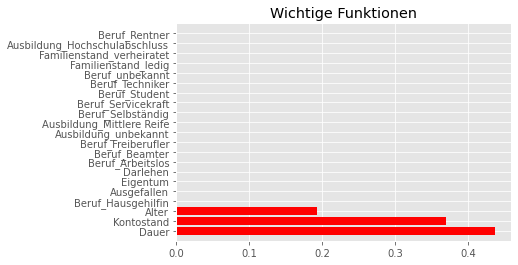

In [ ]:
Funktionsliste=list(X.columns)
modelo= RandomForestClassifier(n_estimators=800,random_state=4711)
modelo.fit(X_train, Y_train)
Wichtige_Funktionen= pd.Series(modelo.feature_importances_,index=Funktionsliste).sort_values(ascending=False)
print(Wichtige_Funktionen)
plt.figure()
plt.title("Wichtige Funktionen")
plt.barh(range(X.shape[1]),Wichtige_Funktionen,
       color="r", align="center")
plt.yticks(range(X.shape[1]), Wichtige_Funktionen.index)
plt.ylim([-1, X.shape[1]])
plt.show()

In [ ]:
rf=RandomForestClassifier(bootstrap = True,max_depth= 81,min_samples_leaf= 1,min_samples_split= 10,n_estimators=800 )
rf.fit(X_train,Y_train)
results= X_test.copy()
predictions=rf.predict(X_test)
results['prediction']=predictions
accuracy=accuracy_score(Y_test,results['prediction'])
print(accuracy)

0.9234449760765551


In [ ]:
from sklearn.metrics import roc_auc_score
predicted_probs = rf.predict_proba(X_test)
results['probability'] =predicted_probs[:,1]
auc=roc_auc_score(Y_test,results['probability'])
print('AUC',auc)

AUC 0.8121000581733566


## Andere Methode(Mehr datenmenge/Auc,Weniger accuracy)

In [ ]:
mms = pd.read_csv('/content/drive/MyDrive/inf505/bank_marketing_adal_v1.0.csv',sep= ';')
mms = pd.get_dummies(mms, drop_first=True)

In [ ]:
dt_numeric = mms.drop(['Label','Ausgefallen','Darlehen','Beruf_Arbeitslos','Beruf_Beamter','Beruf_Freiberufler','Beruf_Hausgehilfin','Beruf_Rentner','Beruf_Selbständig','Beruf_Servicekraft','Beruf_Student','Beruf_Techniker','Beruf_unbekannt','Familienstand_ledig','Familienstand_verheiratet','Ausbildung_Hochschulabschluss','Ausbildung_Mittlere Reife','Ausbildung_unbekannt','Alter','Dauer'],axis=1)
dt_numeric2 = mms.drop(['Label','Ausgefallen','Darlehen','Beruf_Arbeitslos','Beruf_Beamter','Beruf_Freiberufler','Beruf_Hausgehilfin','Beruf_Rentner','Beruf_Selbständig','Beruf_Servicekraft','Beruf_Student','Beruf_Techniker','Beruf_unbekannt','Familienstand_ledig','Familienstand_verheiratet','Ausbildung_Hochschulabschluss','Ausbildung_Mittlere Reife','Ausbildung_unbekannt','Kontostand'],axis=1)
z1 = np.abs(stats.zscore(dt_numeric))
z2 = np.abs(stats.zscore(dt_numeric2))
dt1 = mms[(z1 < 1).all(axis=1)]
dt2 = mms[(z2 < 1).all(axis=1)]
dt = pd.concat([dt1,dt2]).drop_duplicates().reset_index(drop=True)

In [ ]:
dt.shape

(11240, 22)

In [ ]:
X = dt.drop(['Label'],axis=1)
Y = dt['Label']

predict = [x for x in dt.columns if x not in ['Label']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, stratify = Y, random_state = 4711)

Dauer                            0.482130
Kontostand                       0.248672
Alter                            0.147833
Darlehen                         0.012222
Ausbildung_Hochschulabschluss    0.011116
Beruf_Techniker                  0.010719
Familienstand_verheiratet        0.010644
Beruf_Beamter                    0.009431
Familienstand_ledig              0.008918
Beruf_Servicekraft               0.008001
Beruf_unbekannt                  0.007885
Ausbildung_Mittlere Reife        0.007730
Ausbildung_unbekannt             0.006055
Beruf_Selbständig                0.005501
Beruf_Freiberufler               0.004814
Beruf_Rentner                    0.004295
Beruf_Arbeitslos                 0.004293
Ausgefallen                      0.003879
Beruf_Student                    0.003057
Beruf_Hausgehilfin               0.002801
Eigentum                         0.000000
dtype: float64


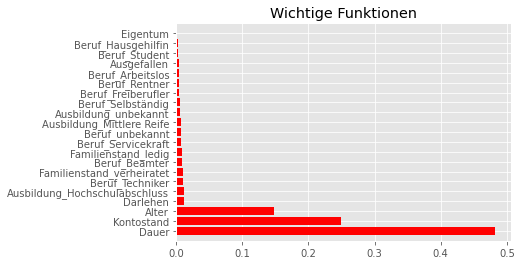

In [ ]:
Funktionsliste=list(X.columns)
modelo= RandomForestClassifier(n_estimators=800,random_state=4711)
modelo.fit(X_train, Y_train)
Wichtige_Funktionen= pd.Series(modelo.feature_importances_,index=Funktionsliste).sort_values(ascending=False)
print(Wichtige_Funktionen)
plt.figure()
plt.title("Wichtige Funktionen")
plt.barh(range(X.shape[1]),Wichtige_Funktionen,
       color="r", align="center")
plt.yticks(range(X.shape[1]), Wichtige_Funktionen.index)
plt.ylim([-1, X.shape[1]])
plt.show()

In [ ]:
rf=RandomForestClassifier(bootstrap = True,max_depth= 81,min_samples_leaf= 1,min_samples_split= 10,n_estimators=800 )
rf.fit(X_train,Y_train)
results= X_test.copy()
predictions=rf.predict(X_test)
results['prediction']=predictions
accuracy=accuracy_score(Y_test,results['prediction'])
print(accuracy)

0.8849347568208779


In [ ]:
from sklearn.metrics import roc_auc_score
predicted_probs = rf.predict_proba(X_test)
results['probability'] =predicted_probs[:,1]
auc=roc_auc_score(Y_test,results['probability'])
print('AUC',auc)

AUC 0.8733646391448127
